In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [156]:
train = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/train.csv")
test = pd.read_csv("/Users/happycatcat523/pyworks/kaggle資料/titanic/test.csv")

In [157]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [158]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [159]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train,test)).reset_index(drop = True)
all_data.drop(['Survived'], axis = 1, inplace = True) 
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 11)


/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [160]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na.head()

Age         20.091673
Cabin       77.463713
Embarked     0.152788
Fare         0.076394
Name         0.000000
dtype: float64

In [161]:
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:50]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

Text(0.5,1,'Percent missing data by feature')

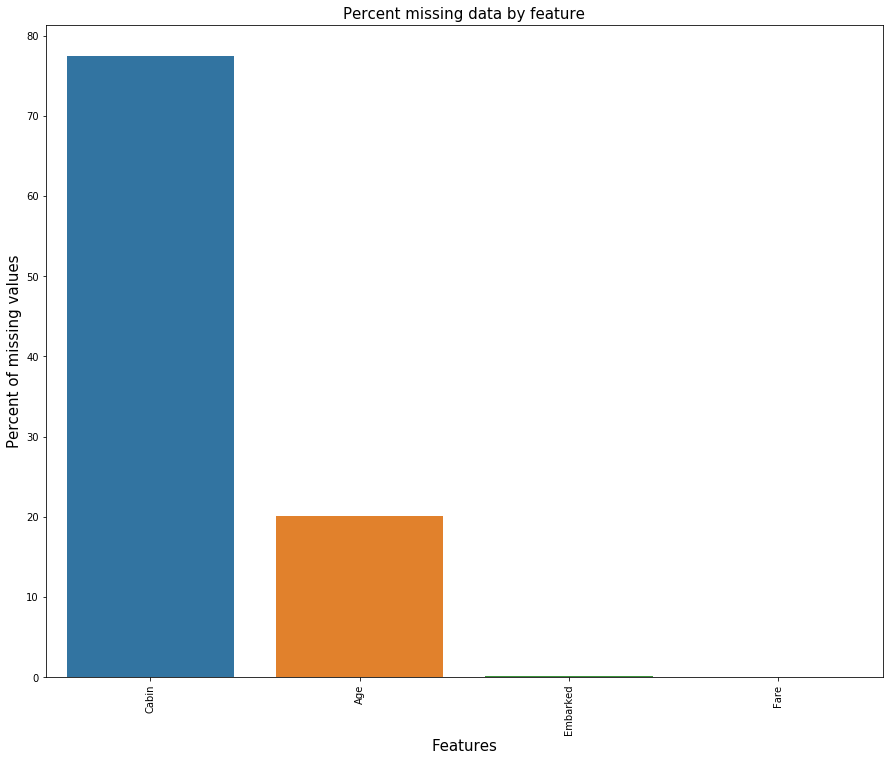

In [162]:
f, ax = plt.subplots(figsize = (15, 12))
plt.xticks(rotation = '90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [163]:
all_data['Cabin'] = all_data['Cabin'].fillna("Undefined")

In [164]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket
0,22.0,Undefined,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599
2,26.0,Undefined,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803
4,35.0,Undefined,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,373450


In [165]:
all_data.dtypes

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Ticket          object
dtype: object

In [166]:
def get_cabin_num(cabin):
    if cabin == "Undefined":
        return np.nan
    else:
        cabins = cabin.split(" ")
        count = len(cabins)
        return count
all_data['CabinCount'] = all_data['Cabin'].apply(get_cabin_num)

In [167]:
all_data.query("CabinCount > 1")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,CabinCount
27,19.00,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,19950,3.0
75,25.00,F G73,S,7.6500,"Moen, Mr. Sigurd Hansen",0,76,3,male,0,348123,2.0
88,23.00,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,19950,3.0
97,23.00,D10 D12,C,63.3583,"Greenfield, Mr. William Bertram",1,98,1,male,0,PC 17759,2.0
118,24.00,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,119,1,male,0,PC 17558,2.0
128,NaN,F E69,C,22.3583,"Peter, Miss. Anna",1,129,3,female,1,2668,2.0
297,2.00,C22 C26,S,151.5500,"Allison, Miss. Helen Loraine",2,298,1,female,1,113781,2.0
299,50.00,B58 B60,C,247.5208,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,300,1,female,0,PC 17558,2.0
305,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,306,1,male,1,113781,2.0
311,18.00,B57 B59 B63 B66,C,262.3750,"Ryerson, Miss. Emily Borie",2,312,1,female,2,PC 17608,4.0


In [168]:
def split_cabin(cabin, num):
    if cabin == "Undefined":
        return "Undefined"
    else:
        cabins = cabin.split(" ")
        if len(cabins) >= num:
            return cabins[num - 1]
        else:
            return "Undefined"
        
all_data['Cabin1'] = all_data['Cabin'].apply(split_cabin, num = 1)
all_data['Cabin2'] = all_data['Cabin'].apply(split_cabin, num = 2)
all_data['Cabin3'] = all_data['Cabin'].apply(split_cabin, num = 3)
all_data['Cabin4'] = all_data['Cabin'].apply(split_cabin, num = 4)

In [169]:
all_data.query("CabinCount > 1").head

<bound method NDFrame.head of         Age            Cabin Embarked      Fare  \
27    19.00      C23 C25 C27        S  263.0000   
75    25.00            F G73        S    7.6500   
88    23.00      C23 C25 C27        S  263.0000   
97    23.00          D10 D12        C   63.3583   
118   24.00          B58 B60        C  247.5208   
128     NaN            F E69        C   22.3583   
297    2.00          C22 C26        S  151.5500   
299   50.00          B58 B60        C  247.5208   
305    0.92          C22 C26        S  151.5500   
311   18.00  B57 B59 B63 B66        C  262.3750   
341   24.00      C23 C25 C27        S  263.0000   
390   36.00          B96 B98        S  120.0000   
435   14.00          B96 B98        S  120.0000   
438   64.00      C23 C25 C27        S  263.0000   
498   25.00          C22 C26        S  151.5500   
679   36.00      B51 B53 B55        C  512.3292   
699   42.00            F G63        S    7.6500   
700   18.00          C62 C64        C  227.5250   
7

In [170]:
def get_cabin_type(cabin):
    return cabin[0]
all_data['CabinType1'] = all_data['Cabin1'].apply(get_cabin_type)
all_data['CabinType2'] = all_data['Cabin2'].apply(get_cabin_type)
all_data['CabinType3'] = all_data['Cabin3'].apply(get_cabin_type)
all_data['CabinType4'] = all_data['Cabin4'].apply(get_cabin_type)

                 Age        Fare  Parch  PassengerId  Pclass  SibSp  \
CabinType1                                                            
U           14576.75  13161.0825    251       304484    1813    376   
B            1573.00   5334.7709     27        24525      47     17   
C            1840.42   5908.9291     28        23980      59     38   
D            1210.00   1889.0710     10        15706      37     14   
E            1143.50   1472.8542     10        16078      42     10   
F             219.50    243.0583      7         4815      31      7   
A             538.00    594.3583      2         6594      15      2   
G              59.00     54.3250      5          864      12      2   
T              45.00     35.5000      0          340       1      0   

            CabinCount  Survived  
CabinType1                        
U                  0.0       206  
B                 64.0        35  
C                 71.0        35  
D                 34.0        25  
E       

/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


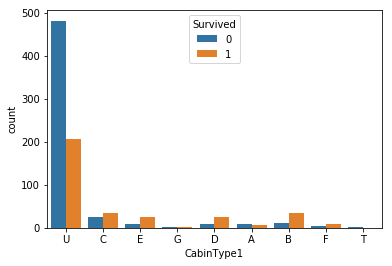

In [171]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch = train_ch.groupby('CabinType1').sum()
print(grouped_ch.sort_values("Survived", ascending = False).head(30))
sns.countplot('CabinType1', hue = 'Survived', data=train_ch )

                 Age        Fare  Parch  PassengerId  Pclass  SibSp  \
CabinType2                                                            
U           20595.25  24754.7869    307       386754    2025    443   
B             325.00   2096.3208     15         6211      11      8   
C             175.92   1734.1750     16         2702       8     14   
D              23.00     63.3583      1           98       1      0   
E               0.00     22.3583      1          129       3      1   
G              86.00     22.9500      0         1492       9      0   

            CabinCount  Survived  
CabinType2                        
U                180.0       328  
B                 28.0         8  
C                 20.0         4  
D                  2.0         1  
E                  2.0         1  
G                  6.0         0  


/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


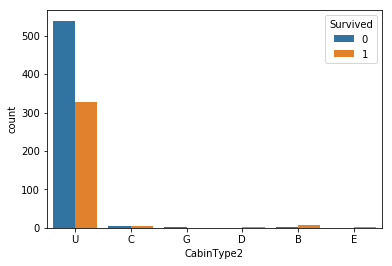

In [172]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch =train_ch.groupby('CabinType2').sum()
print(grouped_ch.sort_values("Survived", ascending = False).head(30))
sns.countplot('CabinType2', hue = 'Survived', data = train_ch)

                 Age        Fare  Parch  PassengerId  Pclass  SibSp  \
CabinType3                                                            
U           20967.17  26599.8701    325       393880    2049    452   
B             108.00   1042.0792      5         2608       4      4   
C             130.00   1052.0000     10          898       4     10   

            CabinCount  Survived  
CabinType3                        
U                212.0       337  
B                 14.0         3  
C                 12.0         2  


/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


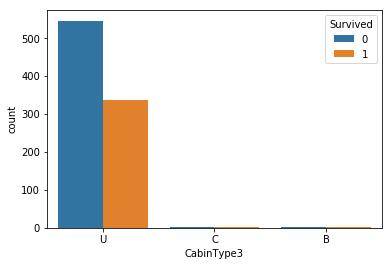

In [173]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch = train_ch.groupby('CabinType3').sum()
print(grouped_ch.sort_values("Survived", ascending = False). head(30))
sns.countplot('CabinType3', hue = 'Survived', data = train_ch)

                 Age        Fare  Parch  PassengerId  Pclass  SibSp  \
CabinType4                                                            
U           21166.17  28169.1993    336       396331    2055    462   
B              39.00    524.7500      4         1055       2      4   

            CabinCount  Survived  
CabinType4                        
U                230.0       340  
B                  8.0         2  


/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


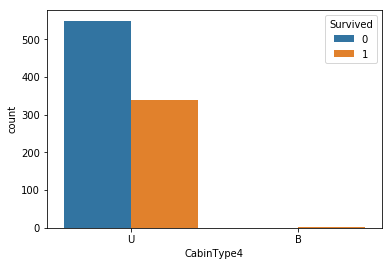

In [174]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch = train_ch.groupby('CabinType4').sum()
print(grouped_ch.sort_values("Survived", ascending = False).head(30))
sns.countplot('CabinType4', hue = 'Survived', data = train_ch)

In [175]:
print(train_ch.query('Survived == 1').size)
print(train_ch.query('Survived != 1').size)

7182
11529


In [176]:
def get_cabin_num(cabin):
    if cabin == "Undefined":
        return "Undefined"
    else:
        return "c_" + cabin[1:]
all_data['CabinNum1'] = all_data['Cabin1'].apply(get_cabin_num)
all_data['CabinNum2'] = all_data['Cabin2'].apply(get_cabin_num)
all_data['CabinNum3'] = all_data['Cabin3'].apply(get_cabin_num)
all_data['CabinNum4'] = all_data['Cabin4'].apply(get_cabin_num)

In [177]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch = train_ch.groupby('CabinNum1').sum()
print(grouped_ch.sort_values("Survived", ascending=False).head(30))

                Age        Fare  Parch  PassengerId  Pclass  SibSp  \
CabinNum1                                                            
Undefined  14576.75  13161.0825    251       304484    1813    376   
c_33         206.00    297.4584      2         2153      10      2   
c_20         203.00    327.4626      0         3162       5      5   
c_101        147.50    599.6584      0         2456       8      2   
c_35         132.00    243.7084      2         2133       4      2   
c_49         160.00    370.7584      1         2473       5      3   
c_96          97.00    480.0000      8         2394       4      4   
c_2           92.50    211.2000      4         1173       8      4   
c_6          116.00    119.8250      5         1671      14      2   
c_23         210.00   1082.0000     10         1529       5     10   
c_17         148.00     78.4084      0         2518       3      0   
c_50         174.00    201.4208      1         2510       4      1   
c_           226.00 

/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [178]:
all_data = all_data.drop('Cabin', axis=1)
all_data = all_data.drop('CabinCount', axis=1)
all_data = all_data.drop('Cabin1', axis=1)
all_data = all_data.drop('Cabin2', axis=1)
all_data = all_data.drop('Cabin3', axis=1)
all_data = all_data.drop('Cabin4', axis=1)

all_data = all_data.drop('CabinType2', axis=1)
all_data = all_data.drop('CabinType3', axis=1)
all_data = all_data.drop('CabinType4', axis=1)
all_data = all_data.drop('CabinNum1', axis=1)
all_data = all_data.drop('CabinNum2', axis=1)
all_data = all_data.drop('CabinNum3', axis=1)
all_data = all_data.drop('CabinNum4', axis=1)

In [179]:
all_data.query('Age != Age').head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,CabinType1
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,330877,U
17,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,244373,U
19,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,2649,U
26,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,2631,U
28,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,330959,U


In [180]:
def get_type_from_name(name):
    array_name = name.split(",")
    family_name = array_name[0]
    name_with_type = array_name[1].split(".")
    type = name_with_type[0].replace(" ","")
    return type
all_data['Type'] = all_data['Name'].apply(get_type_from_name)

In [181]:
all_data["Age"] = all_data.groupby("Type")["Age"].transform(
    lambda x: x.fillna(x.median()))

In [182]:
all_data.query('Embarked != Embarked')

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,CabinType1,Type
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,113572,B,Miss
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,113572,B,Mrs


In [183]:
all_data["Embarked"] = all_data.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode()))

In [184]:
same_ticket_count_gp = all_data.groupby('Ticket', as_index=False).size().reset_index()
same_ticket_count_gp = same_ticket_count_gp.rename(columns={0: 'TicketCount'})
same_ticket_count_gp.head()
all_data = pd.merge(all_data, same_ticket_count_gp, on='Ticket', how='left')
all_data['Fare'] = all_data['Fare'] / all_data['TicketCount']
all_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,CabinType1,Type,TicketCount
0,22.0,S,7.25000,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,U,Mr,1
1,38.0,C,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,C,Mrs,2
2,26.0,S,7.92500,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,U,Miss,1
3,35.0,S,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,C,Mrs,2
4,35.0,S,8.05000,"Allen, Mr. William Henry",0,5,3,male,0,373450,U,Mr,1


In [185]:
all_data["Fere"] =all_data.groupby("Pclass")["Fare"].transform(lambda x : x.fillna(x.median()))

In [186]:
all_data['Type'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'theCountess',
       'Jonkheer', 'Dona'], dtype=object)

In [187]:
# Miss,Master,Mr,Mrs,Msくらいしかいらない。あとはOtherにする
all_data['Type'] = all_data['Type'].replace('Mlle', 'Miss')
all_data['Type'] = all_data['Type'].replace('Ms', 'Miss')
all_data['Type'] = all_data['Type'].replace('Mme', 'Mrs')
all_data['Type'] = [val if val in ['Mr', 'Mrs', 'Miss', 'Ms', 'Master'] else 'Others' for val in all_data['Type']]

             Age         Fare  Parch  PassengerId  Pclass  SibSp  TicketCount  \
Type                                                                            
Master    180.67   305.523627     55        16599     105     92          192   
Miss     4047.00  2860.790120    100        76214     424    130          472   
Mr      16333.50  6952.543775     79       234976    1246    149          869   
Mrs      4504.50  2274.715062    104        57015     251     87          324   
Others   1051.00   571.447933      2        12582      31      8           33   

               Fere  Survived  
Type                           
Master   305.523627        23  
Miss    2860.790120       130  
Mr      6952.543775        81  
Mrs     2274.715062       100  
Others   571.447933         8  


/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


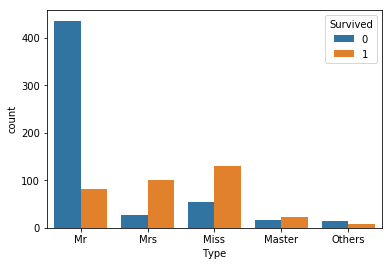

In [188]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
grouped_ch = train_ch.groupby('Type').sum()
print(grouped_ch)
sns.countplot('Type',hue='Survived',data=train_ch)

In [189]:
all_data.dtypes

Age            float64
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Ticket          object
CabinType1      object
Type            object
TicketCount      int64
Fere           float64
dtype: object

In [190]:
all_data['Pclass'] = ['c_' + str(x) for x in all_data.Pclass]

all_data['FareBin'] = pd.cut(all_data.Fare, 10, labels=False)
all_data['AgeBin'] = pd.cut(all_data.Age, 10, labels=False)

In [191]:
def get_ticket_sign_1(ticket):
    array_name = ticket.split(" ")
    if len(array_name) > 1:
        sign = array_name[0]
        array_sign = sign.split("/")
        if len(array_sign) > 1:
            return array_sign[0]
        else:
            return array_sign[0]
    else:     
        return "Undefined"
    
def get_ticket_sign_2(ticket):
    array_name = ticket.split(" ")
    if len(array_name) > 1:
        sign = array_name[0]
        array_sign = sign.split("/")
        if len(array_sign) > 1:
            return array_sign[1]
        else:
            return "Undefined"
    else:
        return "Undefined"

def get_ticket_no(ticket):
    array_name = ticket.split(" ")
    if len(array_name) > 2:
        return array_name[2]
    elif len(array_name) == 2:
        return array_name[1]
    else:
        return array_name[0]
    
all_data['Ticket_Sign1'] = all_data['Ticket'].apply(get_ticket_sign_1)
all_data['Ticket_Sign2'] = all_data['Ticket'].apply(get_ticket_sign_2)
all_data['Ticket_No'] = all_data['Ticket'].apply(get_ticket_no)

In [192]:
# 文字列をラベル化した数値に変換する為のライブラリをインポート
from sklearn.preprocessing import LabelEncoder
# データタイプがobjectの列の値をラベル化した数値に変換
lbl = LabelEncoder()
# lbl.fit(list(all_data['CabinType1'].values))
# all_data['CabinType1'] = lbl.transform(list(all_data['CabinType1'].values))
lbl.fit(list(all_data['Ticket_Sign1'].values))
all_data['Ticket_Sign1'] = lbl.transform(list(all_data['Ticket_Sign1'].values))

In [193]:
all_data_PassengerId = all_data['PassengerId']
all_data_Name = all_data['Name']
all_data = all_data.drop('PassengerId', axis=1)
all_data = all_data.drop('Name', axis=1)

In [194]:
all_data = all_data.drop('Sex', axis=1)
all_data = all_data.drop('Fare', axis=1)
all_data = all_data.drop('FareBin', axis=1)

In [195]:
all_data = pd.get_dummies(all_data)

In [196]:
train_ch = all_data[:ntrain]
train_ch['Survived'] = y_train
# Find correlations with the target and sort
correlations = train_ch.corr()['Survived'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(30))

/Users/happycatcat523/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Most Positive Correlations:
 Ticket_No_367227   NaN
Ticket_No_368364   NaN
Ticket_No_368402   NaN
Ticket_No_368573   NaN
Ticket_No_368702   NaN
Ticket_No_368783   NaN
Ticket_No_369943   NaN
Ticket_No_3701     NaN
Ticket_No_370368   NaN
Ticket_No_370374   NaN
Ticket_No_371109   NaN
Ticket_No_376563   NaN
Ticket_No_382650   NaN
Ticket_No_382653   NaN
Ticket_No_383123   NaN
Ticket_No_383162   NaN
Ticket_No_39186    NaN
Ticket_No_392083   NaN
Ticket_No_392095   NaN
Ticket_No_42795    NaN
Ticket_No_48873    NaN
Ticket_No_49867    NaN
Ticket_No_65305    NaN
Ticket_No_680      NaN
Ticket_No_694      NaN
Ticket_No_7266     NaN
Ticket_No_7538     NaN
Ticket_No_7548     NaN
Ticket_No_7935     NaN
Ticket_No_9232     NaN
Name: Survived, dtype: float64


In [197]:
X_train = all_data.iloc[:train.shape[0],:]
X_test = all_data.iloc[train.shape[0]:,:]
X_test_PassengerId = all_data_PassengerId.iloc[train.shape[0]:]

In [198]:
# モデル用のライブラリインポート
from sklearn.linear_model import LogisticRegression
# Cを1,10,100,1000,10000と変えたがあまり結果に影響はなかった
slr = LogisticRegression()

# fit関数で学習開始
slr.fit(X_train,y_train)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('y切片: {0}'.format(slr.intercept_))

傾き：[-0.00397833 -0.22866932 -0.41785565 ...  0.20516195  0.37863902
  0.52264222]
y切片: [0.67430424]


In [199]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Columns: 1906 entries, Age to Ticket_No_LINE
dtypes: float64(2), int64(5), uint8(1899)
memory usage: 801.3 KB


In [200]:
X_test.isnull().sum()

Age               0
Parch             0
SibSp             0
TicketCount       0
Fere              0
AgeBin            0
Ticket_Sign1      0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
Pclass_c_1        0
Pclass_c_2        0
Pclass_c_3        0
Ticket_110152     0
Ticket_110413     0
Ticket_110465     0
Ticket_110469     0
Ticket_110489     0
Ticket_110564     0
Ticket_110813     0
Ticket_111163     0
Ticket_111240     0
Ticket_111320     0
Ticket_111361     0
Ticket_111369     0
Ticket_111426     0
Ticket_111427     0
Ticket_111428     0
Ticket_112050     0
Ticket_112051     0
                 ..
Ticket_No_6608    0
Ticket_No_6609    0
Ticket_No_680     0
Ticket_No_693     0
Ticket_No_694     0
Ticket_No_695     0
Ticket_No_7075    0
Ticket_No_7076    0
Ticket_No_7077    0
Ticket_No_7266    0
Ticket_No_7267    0
Ticket_No_751     0
Ticket_No_752     0
Ticket_No_7534    0
Ticket_No_7538    0
Ticket_No_7540    0
Ticket_No_7545    0
Ticket_No_7546    0
Ticket_No_7548    0


In [201]:
y_test_pred = slr.predict(X_test)

In [202]:
submission = pd.DataFrame({
    "PassengerId": X_test_PassengerId,
    "Survived": y_test_pred
})
submission.to_csv('logistic04.csv', index=False)